In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
data = pd.read_csv('./data/Final-Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11552 entries, 0 to 11551
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         11552 non-null  int64 
 1   FORMATTED_CONTENT  11525 non-null  object
 2   CLASS              11552 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 270.9+ KB


In [3]:
data = data[['FORMATTED_CONTENT', 'CLASS']]
data.head()

,FORMATTED_CONTENT,CLASS
0,I love this song,0
1,The TREU DETECTIVE alternate ending http www f...,1
2,U don t remember that old commercial,0
3,hey guys i really want to go to a katy perry c...,1
4,Birthdays are good for you Studies show that t...,1


In [4]:
data[data['FORMATTED_CONTENT'].isna()]['CLASS'].value_counts()

1    14
0    13
Name: CLASS, dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data[data['FORMATTED_CONTENT'].isna()]

,FORMATTED_CONTENT,CLASS


In [7]:
data.groupby('CLASS').describe().T

CLASS                                         0  \
FORMATTED_CONTENT count                    5763   
                  unique                   5378   
                  top     Sorry I ll call later   
                  freq                       30   

CLASS                                                   1  
FORMATTED_CONTENT count                              5762  
                  unique                             5370  
                  top     Check out this video on YouTube  
                  freq                                101

<AxesSubplot:xlabel='CLASS'>

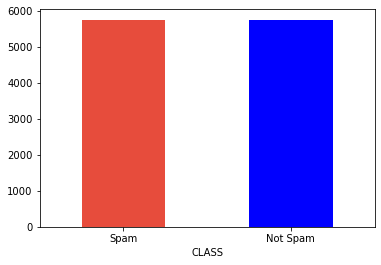

In [8]:
pd.DataFrame({"CLASS": ["Spam", "Not Spam"], "COUNT": data["CLASS"].value_counts()}).plot.bar(x="CLASS", y="COUNT", rot=0, legend=False, color=["#e74c3c", "blue"])

In [9]:
train_content, test_content, train_class, test_class = train_test_split(data['FORMATTED_CONTENT'],data['CLASS'],test_size=0.2,random_state=45)

In [10]:
count_vect = CountVectorizer(stop_words='english')
tfidf_transformer = TfidfTransformer()

In [11]:
train_content_counts = count_vect.fit_transform(train_content)
train_content_counts
train_content_tfidf = tfidf_transformer.fit_transform(train_content_counts)
train_content_tfidf

<9220x16749 sparse matrix of type '<class 'numpy.float64'>'
	with 76467 stored elements in Compressed Sparse Row format>

In [12]:
test_content_counts = count_vect.transform(test_content)
test_content_counts
test_content_tfidf = tfidf_transformer.transform(test_content_counts)
test_content_tfidf

<2305x16749 sparse matrix of type '<class 'numpy.float64'>'
	with 16737 stored elements in Compressed Sparse Row format>

In [13]:
model = LogisticRegression()
model.fit(train_content_tfidf,train_class)

LogisticRegression()

In [14]:
predictions = model.predict(test_content_tfidf)

In [15]:
accuracy_score(test_class, predictions)

0.8880694143167028

In [16]:
print(classification_report(test_class, predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1142
           1       0.95      0.82      0.88      1163

    accuracy                           0.89      2305
   macro avg       0.90      0.89      0.89      2305
weighted avg       0.90      0.89      0.89      2305



<AxesSubplot:>

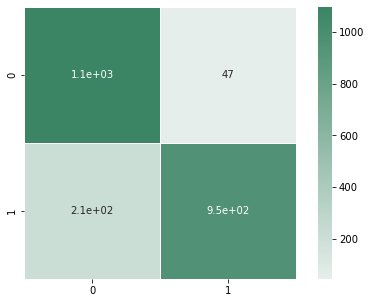

In [17]:
c_matrix = confusion_matrix(test_class, predictions)

f, ax = plt.subplots(figsize = (8, 5))
c_map = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix, center = 0, cmap=c_map, annot= True, square = True, linewidths= 0.5)

In [18]:
model2 = LogisticRegression(C = 2.0)
model2.fit(train_content_tfidf,train_class)

LogisticRegression(C=2.0)

In [19]:
predictions2 = model2.predict(test_content_tfidf)
accuracy_score(test_class, predictions2)

0.8932754880694144

In [20]:
print(classification_report(test_class,predictions2))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1142
           1       0.95      0.84      0.89      1163

    accuracy                           0.89      2305
   macro avg       0.90      0.89      0.89      2305
weighted avg       0.90      0.89      0.89      2305



<AxesSubplot:>

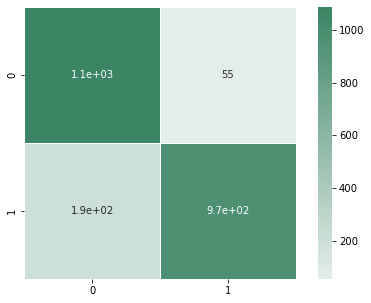

In [21]:
c_matrix2 = confusion_matrix(test_class, predictions2)

f, ax = plt.subplots(figsize = (8, 5))
c_map2 = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix2, center = 0, cmap=c_map2, annot= True, square = True, linewidths= 0.5)

In [22]:
model3 = SVC()
model3.fit(train_content_tfidf,train_class)

SVC()

In [23]:
predictions3 = model3.predict(test_content_tfidf)
accuracy_score(test_class, predictions3)

0.8937093275488069

In [24]:
print(classification_report(test_class,predictions3))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1142
           1       0.96      0.82      0.89      1163

    accuracy                           0.89      2305
   macro avg       0.90      0.89      0.89      2305
weighted avg       0.90      0.89      0.89      2305



<AxesSubplot:>

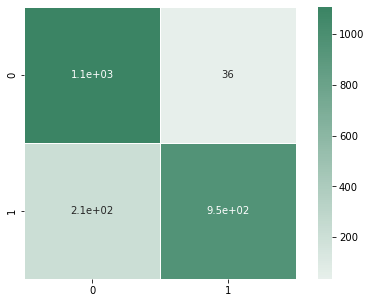

In [25]:
c_matrix3 = confusion_matrix(test_class, predictions3)

f, ax = plt.subplots(figsize = (8, 5))
c_map3 = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix3, center = 0, cmap=c_map3, annot= True, square = True, linewidths= 0.5)

In [26]:
model4 = SVC(kernel='linear')
model4.fit(train_content_tfidf,train_class)
predictions4 = model4.predict(test_content_tfidf)
accuracy_score(test_class, predictions4)

0.8941431670281995

In [27]:
print(classification_report(test_class,predictions4))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1142
           1       0.94      0.84      0.89      1163

    accuracy                           0.89      2305
   macro avg       0.90      0.89      0.89      2305
weighted avg       0.90      0.89      0.89      2305



<AxesSubplot:>

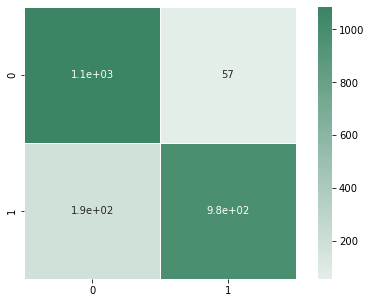

In [28]:
c_matrix4 = confusion_matrix(test_class, predictions4)

f, ax = plt.subplots(figsize = (8, 5))
c_map4 = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix4, center = 0, cmap=c_map4, annot= True, square = True, linewidths= 0.5)

In [30]:
model5 = MLPClassifier(verbose=True, shuffle=True, hidden_layer_sizes=(100,5))
model5.fit(train_content_tfidf,train_class)

Iteration 1, loss = 0.65722230
Iteration 2, loss = 0.51064504
Iteration 3, loss = 0.35640956
Iteration 4, loss = 0.21610576
Iteration 5, loss = 0.12510859
Iteration 6, loss = 0.07941605
Iteration 7, loss = 0.05537031
Iteration 8, loss = 0.04106062
Iteration 9, loss = 0.03192758
Iteration 10, loss = 0.02564675
Iteration 11, loss = 0.02138395
Iteration 12, loss = 0.01773318
Iteration 13, loss = 0.01526196
Iteration 14, loss = 0.01332462
Iteration 15, loss = 0.01180383
Iteration 16, loss = 0.01106012
Iteration 17, loss = 0.00985172
Iteration 18, loss = 0.00907803
Iteration 19, loss = 0.00838819
Iteration 20, loss = 0.00785593
Iteration 21, loss = 0.00749269
Iteration 22, loss = 0.00706625
Iteration 23, loss = 0.00664876
Iteration 24, loss = 0.00641133
Iteration 25, loss = 0.00615016
Iteration 26, loss = 0.00600511
Iteration 27, loss = 0.00573968
Iteration 28, loss = 0.00563533
Iteration 29, loss = 0.00547473
Iteration 30, loss = 0.00530505
Iteration 31, loss = 0.00523620
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 5), verbose=True)

In [31]:
predictions5 = model5.predict(test_content_tfidf)
accuracy_score(test_class, predictions5)

0.8750542299349241

In [32]:
print(classification_report(test_class,predictions5))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1142
           1       0.90      0.85      0.87      1163

    accuracy                           0.88      2305
   macro avg       0.88      0.88      0.88      2305
weighted avg       0.88      0.88      0.87      2305



<AxesSubplot:>

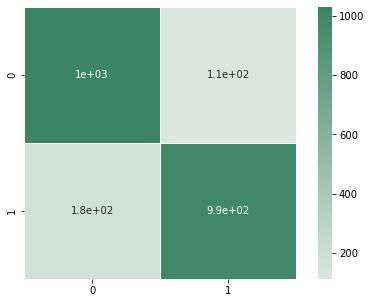

In [33]:
c_matrix5 = confusion_matrix(test_class, predictions5)

f, ax = plt.subplots(figsize = (8, 5))
c_map5 = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix5, center = 0, cmap=c_map5, annot= True, square = True, linewidths= 0.5)

In [108]:
new_test_content = pd.Series(['Happy Birthday Jane Many returs of the day', 'Check out my video here to earn quick money xxxx'])
new_test_content

0          Happy Birthday Jane Many returs of the day
1    Check out my video here to earn quick money xxxx
dtype: object

In [109]:
new_test_counts = count_vect.transform(['Happy Birthday Jane Many returs of the day', 'Check out my video here to earn quick money xxxx'])
new_test_tfidf = tfidf_transformer.transform(new_test_counts)
new_test_tfidf

<2x16749 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [110]:
predictions_new = model.predict(new_test_tfidf)
predictions_new

array([0, 1], dtype=int64)

In [111]:
predictions_new_1 = model2.predict(new_test_tfidf)
predictions_new_1

array([0, 1], dtype=int64)

In [112]:
predictions_new_4 = model4.predict(new_test_tfidf)
predictions_new_4

array([0, 1], dtype=int64)

In [113]:
predictions_new_5 = model5.predict(new_test_tfidf)
predictions_new_5

array([0, 1], dtype=int64)

In [115]:
from joblib import dump, load

In [116]:
dump(count_vect, './model/vectorizer.joblib')

['./model/vectorizer.joblib']

In [117]:
dump(tfidf_transformer, './model/tfidf.joblib')

['./model/tfidf.joblib']

In [118]:
dump(model4, './model/svm_linear.joblib')

['./model/svm_linear.joblib']

In [119]:
dump(model5, './model/mlp.joblib')

['./model/mlp.joblib']

In [120]:
dump(model2, './model/logistic.joblib')

['./model/logistic.joblib']